# CSC360: Homework 2

CSC360: Machine Learning and Pattern Recognition
Instructor: Ellie Sherafat (sherafate@easternct.edu)

---

**Due**: Dec 08, 11:59 PM


**How to submit**: Create a zip folder named "Midterm_your name". Include the `.ipynb` file with your answers plus its `.html` file as a backup. 


**Your questions**: 

1- If you have a question for me, post it under the "Questions for the Professor" forum. Any post is visible to your classmates, and they may benefit as well. 

2- Collaboration is allowed but everyone should submit individually


**Important**:
- The places that require your code answer are marked with `"# YOUR CODE"` comments.
- Please do not procrastinate! Reach out to your study group member and start working on the questions as soon as you can.

Good Luck!

---

## Name:[Enter your name here]

---

## 1) Dimensionality Reduction

The curse of dimensionality is an issue for many applications; increasing the number of features will not always improve classification accuracy. Dimensionality reduction techniques can help with the issue. The goal is to choose an optimum set of features of lower dimensionality to improve classification accuracy. These techniques fall into two major categories: 
<br> **Feature selection:** chooses a subset of the original features
<br> **Feature extraction:** finds a set of new features (i.e., through some mapping f()) from the existing features

<br> **Principle Component Analysis (PCA)** is a feature extraction technique that can be used to both compression (reduce the memory needed to store the data, speed up learning algorithm) and visualization. 


### 1-1) PCA for visualization
You can think of principle components as new features, which are linear combinations of the original features. They capture most variances in the data. 
<br><br> Complete the code in this section and run it.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
bc = load_breast_cancer()

# Look at only two first data points
print('{}\n'.format(repr(bc.data[:2])))
print('Data shape: {}\n'.format(bc.data.shape))

# Class labels
print('{}\n'.format(repr(bc.target[:2])))
print('Labels shape: {}\n'.format(bc.target.shape))

# Label names
print('{}\n'.format(list(bc.target_names)))

malignant = bc.data[bc.target == 0]
print('Malignant shape: {}\n'.format(malignant.shape))

benign = bc.data[bc.target == 1]
print('Benign shape: {}\n'.format(benign.shape))


array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02]])

Data shape: (569, 30)

array([0, 0])

Labels shape: (569,)

['malignant', 'benign']

Malignant shape: (212, 30)

Benign shape: (357, 30)



In [2]:
# Apply PCA
X,y = bc.data, bc.target
pca_obj = PCA(n_components=2)
component_data = pca_obj.fit_transform(X)

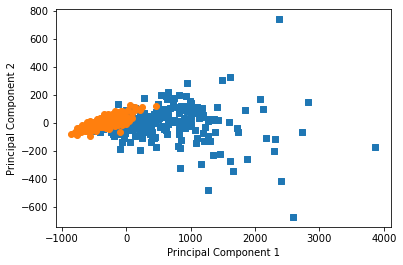

In [3]:
# Visualize using PCA
import matplotlib.pyplot as plt
%matplotlib inline

for lab, m in zip((0, 1),('s', 'o')):
    plt.scatter(component_data[y==lab, 0], # 1st principle component
                component_data[y==lab, 1], # 2nd principle component
                label=lab,
                marker=m)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# YOUR CODE ---> Add legend to the plot
# YOUR CODE ---> Add title "Breast Cancer Dataset PCA Plot"
plt.show()

### 1-2) PCA in a pipeline

Run the following codes. Does adding PCA to the pipeline reduce overfitting in this dataset?

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

dataset = pd.read_csv('Wine.csv')
X = dataset.drop('Wine', axis =1)
y = dataset['Wine']
dataset.head()

print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))
print('\nHeader: %s' % ['alcohol', 'malic acid', 'ash', 'ash alcalinity',
                        'magnesium', 'total phenols', 'flavanoids',
                        'nonflavanoid phenols', 'proanthocyanins',
                        'color intensity', 'hue', 'OD280/OD315 of diluted wines',
                        'proline'])

print('\nClasses: %s' % np.unique(y))
print('Class distribution: %s' % np.bincount(y))

Dimensions: 178 x 13

Header: ['alcohol', 'malic acid', 'ash', 'ash alcalinity', 'magnesium', 'total phenols', 'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue', 'OD280/OD315 of diluted wines', 'proline']

Classes: [0 1 2]
Class distribution: [59 71 48]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3, stratify=y)

pipe = make_pipeline(StandardScaler(),
                     KNeighborsClassifier(n_neighbors=5))

pipe.fit(X_train, y_train)

print('Orig. training accyracy: %.2f%%' % (pipe.score(X_train, y_train)*100))
print('Orig. test accyracy: %.2f%%' % (pipe.score(X_test, y_test)*100))

Orig. training accyracy: 99.19%
Orig. test accyracy: 92.59%


In [6]:
pipe_pca = make_pipeline(StandardScaler(),
                         PCA(n_components=3),
                         KNeighborsClassifier(n_neighbors=5))

pipe_pca.fit(X_train, y_train)


print('Transf. training accyracy: %.2f%%' % (pipe_pca.score(X_train, y_train)*100))
print('Transf. test accyracy: %.2f%%' % (pipe_pca.score(X_test, y_test)*100))

Transf. training accyracy: 96.77%
Transf. test accyracy: 96.30%


## 2) Random Forests
One of the random forests output is **feature importance**. It gives you a notion of how much each feature contributes to the decision. You can use the feature importance information to (1) interpret your model and get more insight, or (2) you can use it as a feature selection method. How? Re-run your model with a subset of features that pass a certain threshold.

<br> 1) Run the code. Which feature is the most important one?
<br> 2) Set the feature selection's threshold equal to "1.25*median". How many features will be selected?
<br> 3) Does the performance improve using the reduced set of features?

In [7]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=123), threshold='1.25*median')
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support() # Get a mask, or integer index, of the features selected
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

6 selected features
['Alcohol', 'Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline']


In [8]:
X_transform = embeded_rf_selector.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, random_state=123, test_size=0.3, stratify=y)

pipe = make_pipeline(StandardScaler(),
                     KNeighborsClassifier(n_neighbors=5))

pipe.fit(X_train, y_train)

print('Orig. training accyracy: %.2f%%' % (pipe.score(X_train, y_train)*100))
print('Orig. test accyracy: %.2f%%' % (pipe.score(X_test, y_test)*100))

Orig. training accyracy: 99.19%
Orig. test accyracy: 98.15%


Alcohol                 0.109683
Malic.acid              0.032723
Ash                     0.012273
Acl                     0.029420
Mg                      0.028791
Phenols                 0.057904
Flavanoids              0.133867
Nonflavanoid.phenols    0.008221
Proanth                 0.027035
Color.int               0.158535
Hue                     0.076407
OD                      0.138427
Proline                 0.186715
dtype: float64


<AxesSubplot:>

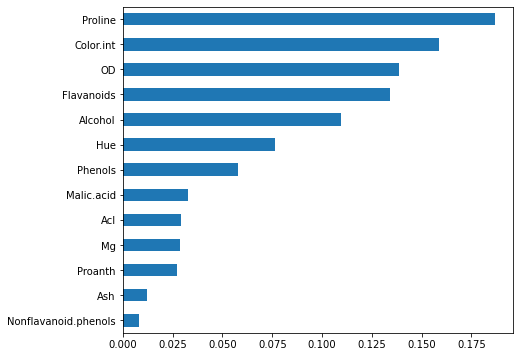

In [9]:
feature_importances = pd.Series(embeded_rf_selector.estimator_.feature_importances_, index=X.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6))